 # Project: Dog Breed Classification




In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


### Load Dataset Files

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given project_path variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/AIML/R8/DogBreed/"


Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'dog-breed-identification.zip', 'r') as z:
  z.extractall()

In [0]:
ls -l

total 26344
drwx------ 4 root root     4096 Dec 16 16:23 gdrive/
-rw-r--r-- 1 root root   482063 Dec 16 16:26 labels.csv
drwxr-xr-x 1 root root     4096 Dec 12 16:48 sample_data/
-rw-r--r-- 1 root root 25200295 Dec 16 16:26 sample_submission.csv
drwxr-xr-x 2 root root   651264 Dec 16 16:26 test/
drwxr-xr-x 2 root root   630784 Dec 16 16:27 train/



After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas


In [0]:
traindf = pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset


In [0]:
traindf.groupby(by='breed').count()


,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


In [0]:
traindf.isnull()

,id,breed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10217,False,False
10218,False,False
10219,False,False
10220,False,False


There is no need for cleaning the data as there are no missing values.

### Data Representation & Feature Engineering 

In [0]:
# Get one-hot encodings of labels


In [0]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels_en_df = pd.get_dummies(traindf.breed)


In [0]:
labels_en_df.head(10)


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Preparing training dataset


In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

In [0]:

for f, img in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:34<00:00, 295.66it/s]


In [0]:

y_train[20]

'doberman'

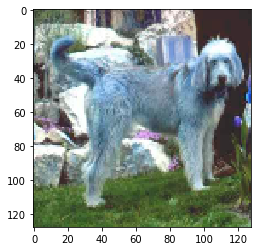

In [0]:
plt.imshow(x_train[21])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model



In [0]:
x_train_conv = np.array(x_train)


In [0]:
x_train_conv.shape


(10222, 128, 128, 3)

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255


In [0]:
y_train_class = pd.get_dummies(y_train)


In [0]:
y_train_class.shape


(10222, 120)

### Split the training and validation data from x_train_conv and y_train_class obtained from above step

In [0]:
### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=7)

### Loading the test data


Read the id column from the samples_submission.csv and store it in test_img



In [0]:
test_img_df = pd.read_csv('sample_submission.csv',usecols=[0])


In [0]:
test_img_df.head()


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


Run the below code to load the test image files in x_test_feature



In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:33<00:00, 311.42it/s]


Normalize the test data and convert it into 4 dimensions



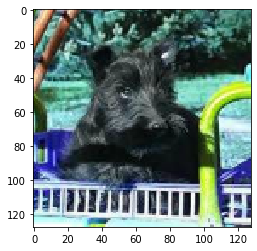

In [0]:
plt.imshow(x_test_feature[20])


In [0]:
x_test_conv = np.array(x_test_feature)


In [0]:
x_test_conv.shape


(10357, 128, 128, 3)

## Model Creation

In [0]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dense(120, activation='softmax'))

In [0]:
model_conv.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

### Execute the model


In [0]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [0]:
%%time 
output_conv = model_conv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





 - 107s - loss: 4.7934 - acc: 0.0068 - val_loss: 4.7874 - val_acc: 0.0117
Epoch 2/10
 - 106s - loss: 4.7835 - acc: 0.0140 - val_loss: 4.7845 - val_acc: 0.0111
Epoch 3/10
 - 106s - loss: 4.7787 - acc: 0.0144 - val_loss: 4.7826 - val_acc: 0.0153
Epoch 4/10
 - 106s - loss: 4.7749 - acc: 0.0169 - val_loss: 4.7813 - val_acc: 0.0130
Epoch 5/10
 - 108s - loss: 4.7708 - acc: 0.0176 - val_loss: 4.7790 - val_acc: 0.0179
Epoch 6/10
 - 107s - loss: 4.7661 - acc: 0.0208 - val_loss: 4.7765 - val_acc: 0.0163
Epoch 7/10
 - 107s - loss: 4.7599 - acc: 0.0207 - val_loss: 4.7721 - val_acc: 0.0196
Epoch 8/10
 - 107s - loss: 4.7519 - acc: 0.0204 - val_loss: 4.7662 - val_acc: 0.0186
Epoch 9/10
 - 107s - loss: 4.7426 - acc: 0.0207 - val_loss: 4.7569 - val_acc: 0.0199
Epoch 10/10
 - 108s - loss: 4.7302 - acc: 0.0238 - val_loss: 4.7478 - val_acc: 0.0215

### The model accuracy is very poor.


## Training and Evaluation

### Run Multiple Experiments

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [0]:

data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

Using the above objects, create the image generators with variable names train_generator and val_generator

You need to use train_datagen.flow() and val_datagen.flow()



In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)


In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)


### Fit the model using fit_generator() using train_generator and val_generator from the above step with 10 epochs

In [0]:
output_imggen = model_conv.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2, steps_per_epoch=20, validation_steps=80)


Epoch 1/10
 - 138s - loss: 4.7991 - acc: 0.0148 - val_loss: 4.7837 - val_acc: 0.0124
Epoch 2/10
 - 132s - loss: 4.7661 - acc: 0.0169 - val_loss: 4.7775 - val_acc: 0.0148
Epoch 3/10
 - 131s - loss: 4.7490 - acc: 0.0156 - val_loss: 4.7721 - val_acc: 0.0149
Epoch 4/10
 - 132s - loss: 4.7497 - acc: 0.0141 - val_loss: 4.7730 - val_acc: 0.0103
Epoch 5/10
 - 132s - loss: 4.7561 - acc: 0.0113 - val_loss: 4.7568 - val_acc: 0.0150
Epoch 6/10
 - 130s - loss: 4.7480 - acc: 0.0146 - val_loss: 4.7586 - val_acc: 0.0159
Epoch 7/10
 - 132s - loss: 4.7479 - acc: 0.0152 - val_loss: 4.7556 - val_acc: 0.0143
Epoch 8/10
 - 130s - loss: 4.7355 - acc: 0.0141 - val_loss: 4.7473 - val_acc: 0.0158
Epoch 9/10
 - 132s - loss: 4.7269 - acc: 0.0172 - val_loss: 4.7466 - val_acc: 0.0169
Epoch 10/10
 - 131s - loss: 4.7253 - acc: 0.0160 - val_loss: 4.7431 - val_acc: 0.0162
